In [45]:
from datetime import datetime

import autograd.numpy as np
import capytaine as cpy
import matplotlib.pyplot as plt
from scipy.optimize import brute
import statsmodels.api as sm
import pingouin as pg

import wecopttool as wot
import xarray as xr

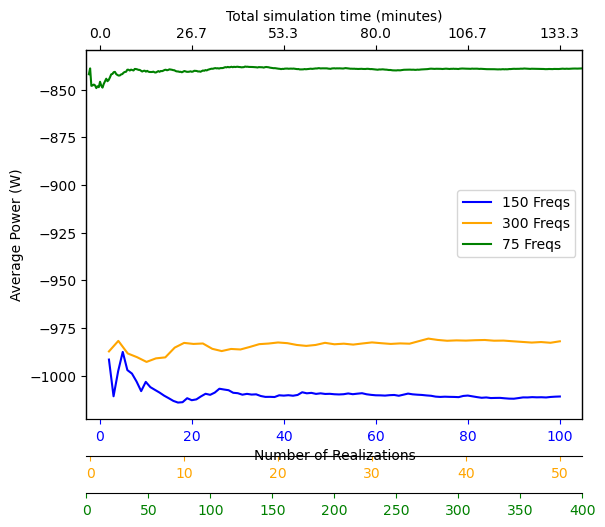

In [46]:
# load results

res_ds_150 = xr.load_dataset('pioneer_power_convergence_150.nc')
f1_150 = 1.875/150

res_ds_300 = xr.load_dataset('pioneer_power_convergence_300.nc')
f1_300 = 1.875/300

res_ds_75 = xr.load_dataset('pioneer_power_convergence_75.nc')
f1_75 = 1.875/75

rolling_mean_150 = []

for ind in range(len(res_ds_150['power'])):

    rolling_mean_150.append(np.mean(res_ds_150['power'][0:ind]))
    
realization_number_150 = range(1,len(res_ds_150['power'])+1)

rolling_mean_300 = []

for ind in range(len(res_ds_300['power'])):

    rolling_mean_300.append(np.mean(res_ds_300['power'][0:ind]))
    
realization_number_300 = range(1,len(res_ds_300['power'])+1)

rolling_mean_75 = []
for ind in range(len(res_ds_75['power'])):
    rolling_mean_75.append(np.mean(res_ds_75['power'][0:ind]))
realization_number_75 = range(1,len(res_ds_75['power'])+1)
    
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()
ax3 = ax1.twiny()
ax4 = ax1.twiny()
ax1.plot(realization_number_150,rolling_mean_150, label='150 Freqs', color = 'blue')
ax1.set_xlabel('Number of Realizations')
ax1.set_ylabel('Average Power (W)')
ax1.tick_params(axis='x', colors='blue')

ax2.plot(realization_number_300,rolling_mean_300, label='300 Freqs', color = 'orange')
ax2.xaxis.set_ticks_position("bottom")
ax2.xaxis.set_label_position("bottom")
ax2.spines["bottom"].set_position(("axes", -0.1))
ax2.tick_params(axis='x', colors='orange')

ax3.plot(realization_number_75,rolling_mean_75, label='75 Freqs', color = 'green')
ax3.xaxis.set_ticks_position("bottom")
ax3.xaxis.set_label_position("bottom")
ax3.spines["bottom"].set_position(("axes", -0.2))
ax3.tick_params(axis='x', colors='green')
ax3.set_xlim([0, 400])

# also plot total time
tperreal = 1/f1_150

def tick_function(X):
    V = tperreal*X/60
    return ["%.1f" % z for z in V]

ax4.set_xticks(ax1.get_xticks())
ax4.set_xbound(ax1.get_xbound())
ax4.set_xticklabels(tick_function(ax1.get_xticks()))
ax4.set_xlabel('Total simulation time (minutes)')

fig.legend(bbox_to_anchor=(0, 0.5, .9, .102))

17.27539035559393
22.253188328652413
18.188865357182543


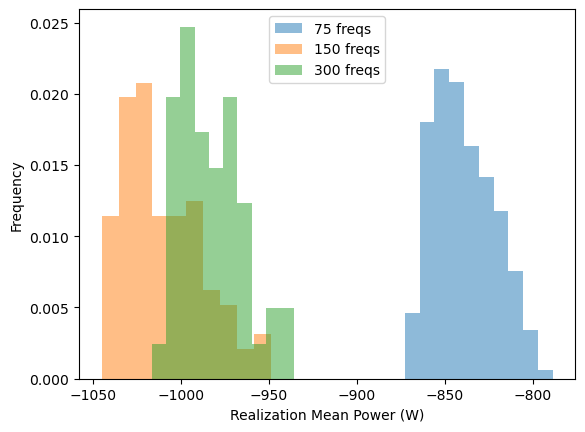

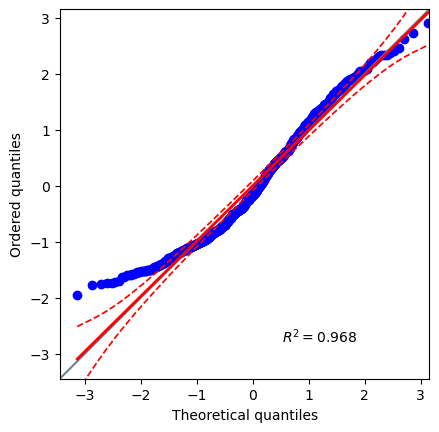

In [47]:
# analyze the statistical characteristics of each frequency number and realizations

plt.figure()
plt.hist(res_ds_75['power'],bins=10,alpha=0.5,density=True,label='75 freqs')
plt.hist(res_ds_150['power'],bins=10,alpha=0.5,density=True,label='150 freqs')
plt.hist(res_ds_300['power'],bins=10,alpha=0.5,density=True,label='300 freqs')
plt.legend()
plt.xlabel('Realization Mean Power (W)')
plt.ylabel('Frequency')

plt.figure()
pg.qqplot(res_ds_75['power'], dist='norm', confidence=.95)

# check standard deviation of each:
stdev_75 = np.std(res_ds_75['power'])
stdev_150 = np.std(res_ds_150['power'])
stdev_300 = np.std(res_ds_300['power'])

print(stdev_75.values)
print(stdev_150.values)
print(stdev_300.values)

[150.0, 75.0, 50.0, 38.0, 30.0, 25.0, 21.0, 19.0, 17.0, 15.0, 14.0, 12.0, 12.0, 11.0, 10.0]


C:\Users\jtgrasb\AppData\Local\Temp\ipykernel_25348\2025913341.py:33: RuntimeWarning: divide by zero encountered in scalar divide
  V = [(1/(fend/nfreq)) for nfreq in X]


[-16770.25581179 -15146.65732016 -15031.21339525 -15039.8679254
 -15039.3516797  -15039.36968962 -15039.3698061  -15039.36978103
 -15039.37016868 -15039.37046246 -15039.37008754 -15039.37053005
 -15039.37013524 -15039.37002017 -15039.3703017 ]


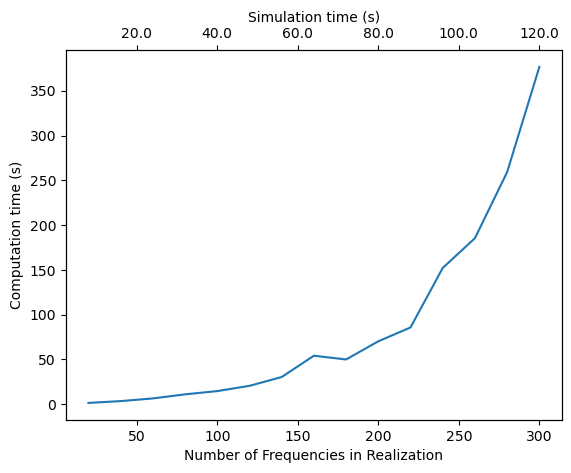

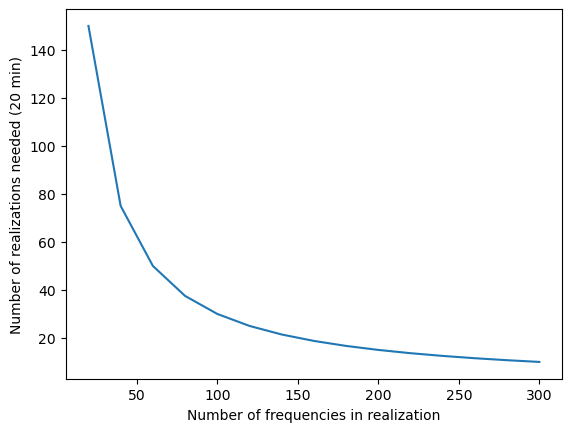

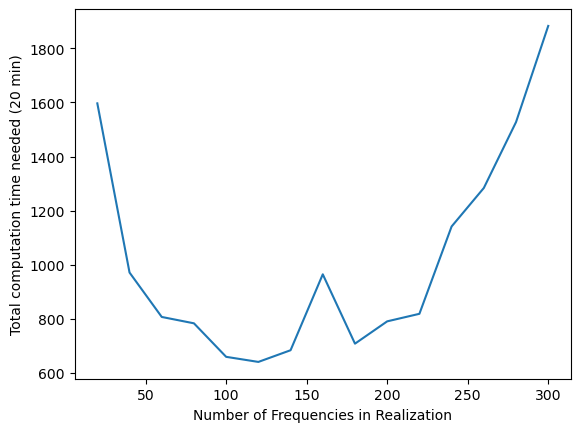

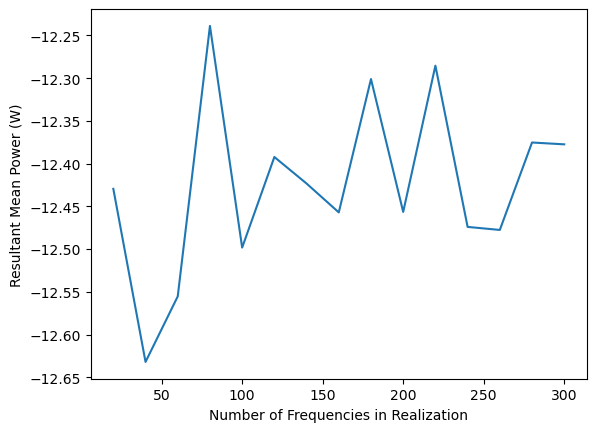

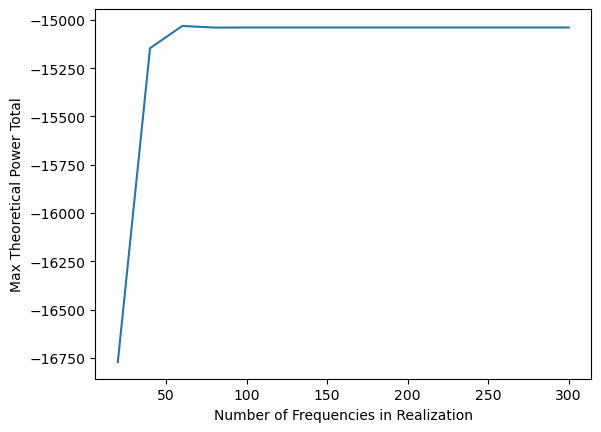

In [49]:
import xarray as xr
nfreqs = np.linspace(50,300,15)
fend = 2.5
minutes_needed = 20

res_ds = xr.load_dataset('wavebot_freq_time_lowfreqs.nc')
#print(res_ds)

#print(res_ds)

nfreqs = res_ds['ind'].values
runtime = res_ds['time'].values
meanpower = res_ds['power'].values
maxpower = res_ds['pmax'].values

nrealizations_needed = [np.round(minutes_needed*60*(fend/nfreq)) for nfreq in nfreqs]

print(nrealizations_needed)

# Plot the computation time vs. number of frequencies

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()
ax1.plot(nfreqs,runtime/nrealizations_needed)
ax1.set_xlabel('Number of Frequencies in Realization')
ax1.set_ylabel('Computation time (s)')

# also plot total time
tperreal = 1/.02

def tick_function(X):
    V = [(1/(fend/nfreq)) for nfreq in X]
    return ["%.1f" % z for z in V]

ax2.set_xticks(ax1.get_xticks())
ax2.set_xbound(ax1.get_xbound())
ax2.set_xticklabels(tick_function(ax1.get_xticks()))
ax2.set_xlabel('Simulation time (s)')

# plot total simulation time for each number of frequencies

sim_times = [(1/(fend/nfreq)) for nfreq in nfreqs]

nrealizations_needed = [minutes_needed*60/sim_time for sim_time in sim_times]

#print(nrealizations_needed.type())
total_times = [a*b for a, b in zip(nrealizations_needed,runtime/20)]

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(nfreqs,nrealizations_needed)
ax1.set_xlabel('Number of frequencies in realization')
ax1.set_ylabel('Number of realizations needed (20 min)')

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(nfreqs,total_times)
ax1.set_xlabel('Number of Frequencies in Realization')
ax1.set_ylabel('Total computation time needed (20 min)')

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(nfreqs,meanpower)
ax1.set_xlabel('Number of Frequencies in Realization')
ax1.set_ylabel('Resultant Mean Power (W)')

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(nfreqs,maxpower)
ax1.set_xlabel('Number of Frequencies in Realization')
ax1.set_ylabel('Max Theoretical Power Total')

print(maxpower)

Text(0.5, 0, 'Total simulation time (minutes)')

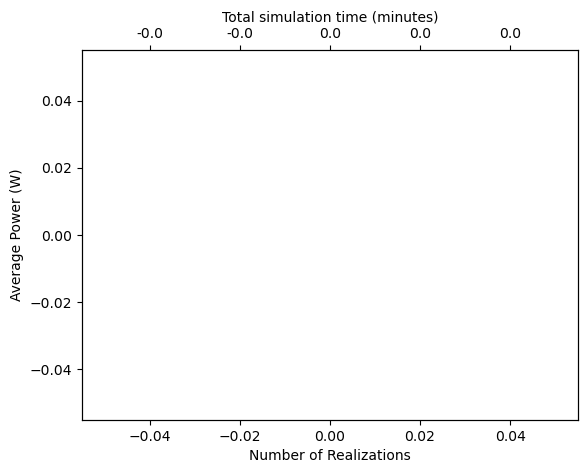

In [3]:
# load results

res_ds = xr.load_dataset('lupa_power_convergence.nc')

rolling_mean = []

for ind in range(len(res_ds['power'])):

    rolling_mean.append(np.mean(res_ds['power'][0:ind]))
    
realization_number = range(1,len(res_ds['power'])+1)    

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()
ax1.plot(realization_number,rolling_mean)
ax1.set_xlabel('Number of Realizations')
ax1.set_ylabel('Average Power (W)')

# also plot total time
tperreal = 1/.02

def tick_function(X):
    V = tperreal*X/60
    return ["%.1f" % z for z in V]

ax2.set_xticks(ax1.get_xticks())
ax2.set_xbound(ax1.get_xbound())
ax2.set_xticklabels(tick_function(ax1.get_xticks()))
ax2.set_xlabel('Total simulation time (minutes)')

[90.0, 45.0, 30.0, 22.0, 18.0, 15.0]


C:\Users\jtgrasb\AppData\Local\Temp\ipykernel_11532\1970242799.py:33: RuntimeWarning: divide by zero encountered in scalar divide
  V = [(1/(fend/nfreq)) for nfreq in X]


Text(0, 0.5, 'Max Theoretical Power Total')

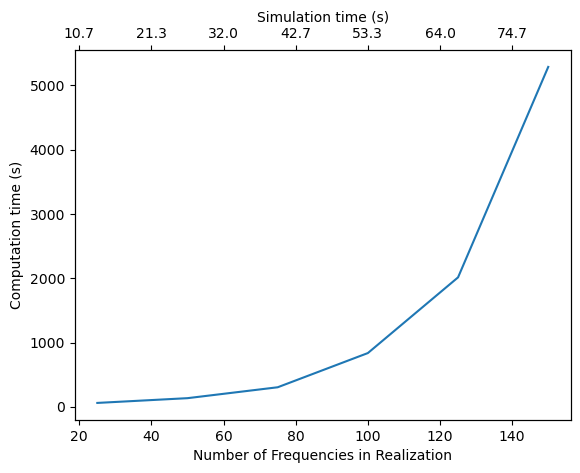

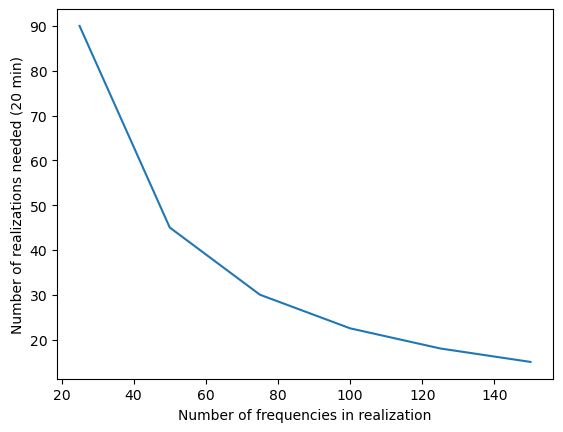

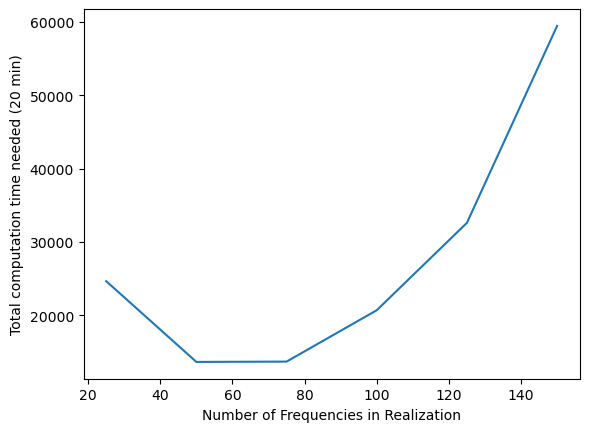

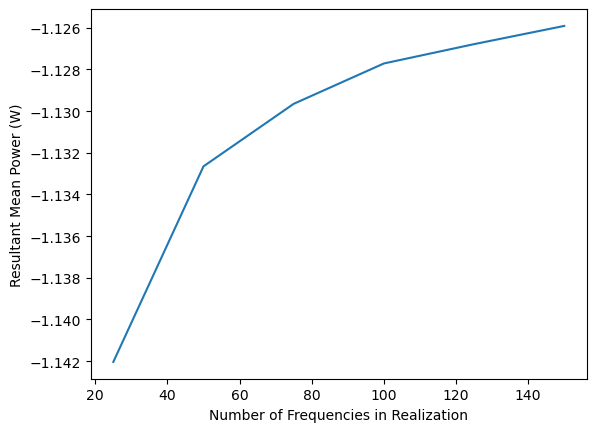

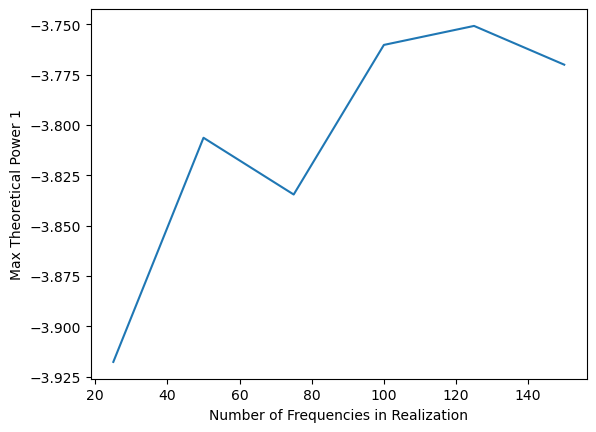

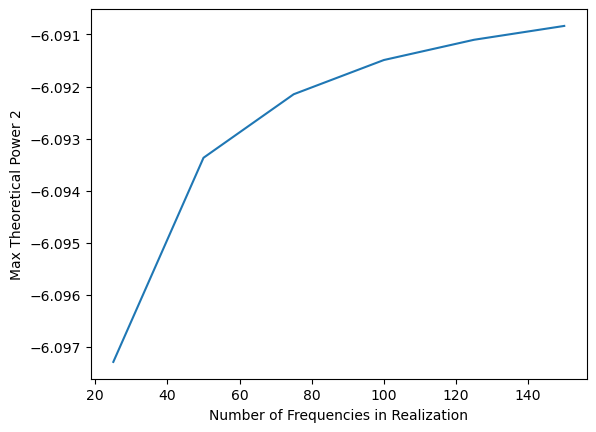

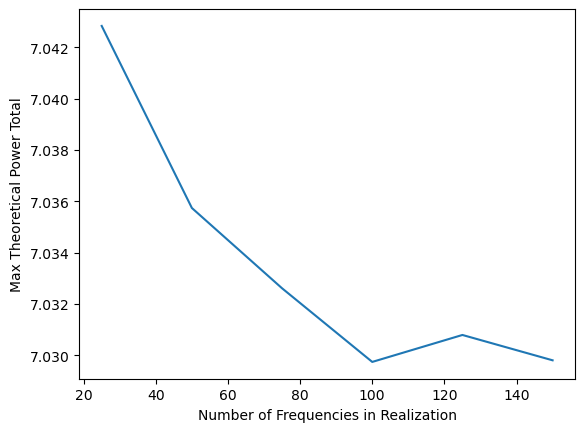

In [5]:
import xarray as xr
nfreqs = np.linspace(25,150,6)
fend = 1.875
minutes_needed = 20

res_ds = xr.load_dataset('LUPA_freq_time.nc')

#print(res_ds)

runtime = res_ds['time'].values
meanpower = res_ds['power'].values
maxpower1 = res_ds['pmax1'].values
maxpower2 = res_ds['pmax2'].values
maxpowerTot = res_ds['pmaxTot'].values

nrealizations_needed = [np.round(minutes_needed*60*(fend/nfreq)) for nfreq in nfreqs]

print(nrealizations_needed)

# Plot the computation time vs. number of frequencies

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()
ax1.plot(nfreqs,runtime/nrealizations_needed)
ax1.set_xlabel('Number of Frequencies in Realization')
ax1.set_ylabel('Computation time (s)')

# also plot total time
tperreal = 1/.02

def tick_function(X):
    V = [(1/(fend/nfreq)) for nfreq in X]
    return ["%.1f" % z for z in V]

ax2.set_xticks(ax1.get_xticks())
ax2.set_xbound(ax1.get_xbound())
ax2.set_xticklabels(tick_function(ax1.get_xticks()))
ax2.set_xlabel('Simulation time (s)')

# plot total simulation time for each number of frequencies

sim_times = [(1/(fend/nfreq)) for nfreq in nfreqs]

nrealizations_needed = [minutes_needed*60/sim_time for sim_time in sim_times]

#print(nrealizations_needed.type())
total_times = [a*b for a, b in zip(nrealizations_needed,runtime/20)]

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(nfreqs,nrealizations_needed)
ax1.set_xlabel('Number of frequencies in realization')
ax1.set_ylabel('Number of realizations needed (20 min)')

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(nfreqs,total_times)
ax1.set_xlabel('Number of Frequencies in Realization')
ax1.set_ylabel('Total computation time needed (20 min)')

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(nfreqs,meanpower)
ax1.set_xlabel('Number of Frequencies in Realization')
ax1.set_ylabel('Resultant Mean Power (W)')

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(nfreqs,maxpower1)
ax1.set_xlabel('Number of Frequencies in Realization')
ax1.set_ylabel('Max Theoretical Power 1')
#ax1.set_ylim([-53100, -53050])

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(nfreqs,maxpower2)
ax1.set_xlabel('Number of Frequencies in Realization')
ax1.set_ylabel('Max Theoretical Power 2')

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(nfreqs,maxpowerTot)
ax1.set_xlabel('Number of Frequencies in Realization')
ax1.set_ylabel('Max Theoretical Power Total')

[45.0, 30.0, 22.0, 18.0, 15.0, 13.0, 11.0, 10.0, 9.0, 8.0, 8.0]
[-53331.95156349 -53066.49402019 -53057.6300094  -53064.44747229
 -53065.04801841 -53064.59159628 -53061.41311748 -53064.87931387
 -53064.65823241 -53064.46620201 -53062.5076711 ]


C:\Users\jtgrasb\AppData\Local\Temp\ipykernel_25348\1288881683.py:35: RuntimeWarning: divide by zero encountered in scalar divide
  V = [(1/(fend/nfreq)) for nfreq in X]


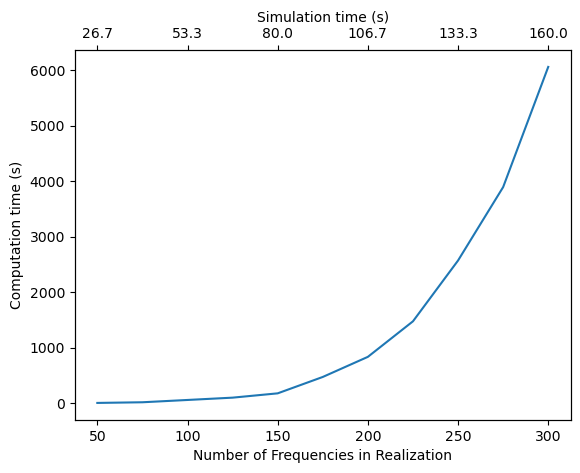

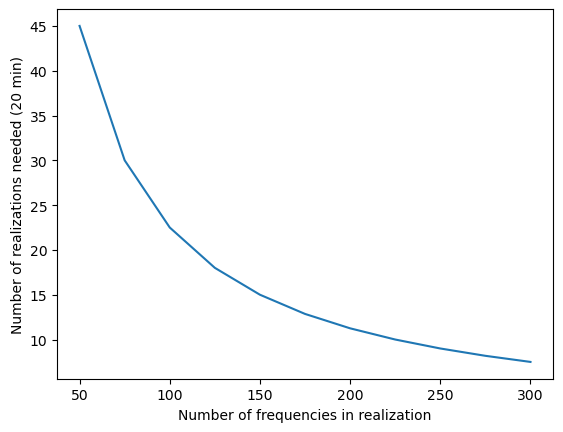

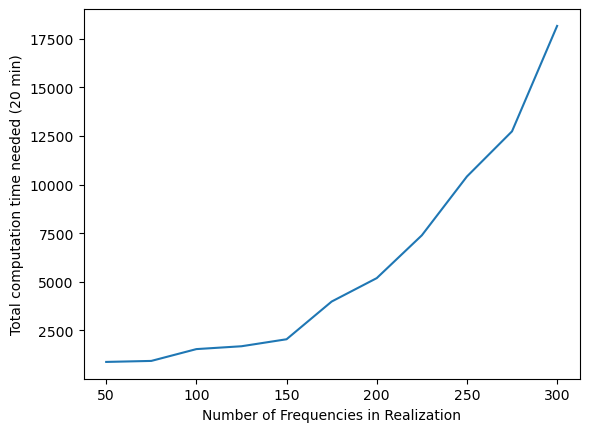

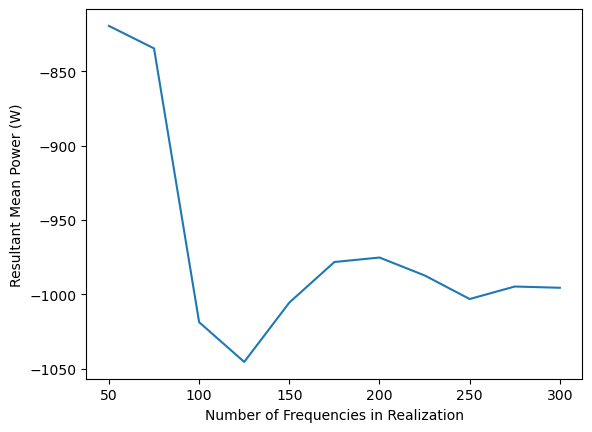

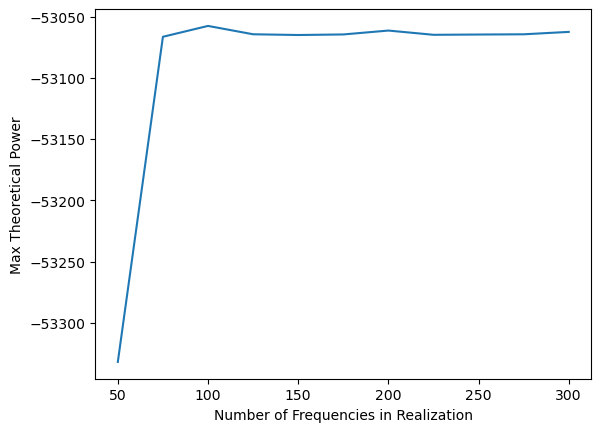

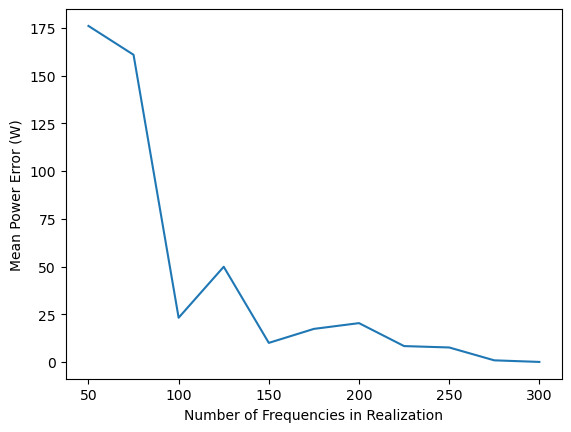

In [38]:
import xarray as xr
nfreqs = np.linspace(50,300,11)
#nfreqs = [30,60,120,240]
fend = 1.875
minutes_needed = 20

# average power 300 freqs
mean_power_actual = -995.60298198

res_ds = xr.load_dataset('pioneer_freq_time.nc')

#print(res_ds)

runtime = res_ds['time'].values
meanpower = res_ds['power'].values
maxpower = res_ds['pmax'].values

nrealizations_needed = [np.round(minutes_needed*60*(fend/nfreq)) for nfreq in nfreqs]

print(nrealizations_needed)

# Plot the computation time vs. number of frequencies

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()
ax1.plot(nfreqs,runtime/nrealizations_needed)
ax1.set_xlabel('Number of Frequencies in Realization')
ax1.set_ylabel('Computation time (s)')

# also plot total time
tperreal = 1/.02

def tick_function(X):
    V = [(1/(fend/nfreq)) for nfreq in X]
    return ["%.1f" % z for z in V]

ax2.set_xticks(ax1.get_xticks())
ax2.set_xbound(ax1.get_xbound())
ax2.set_xticklabels(tick_function(ax1.get_xticks()))
ax2.set_xlabel('Simulation time (s)')

# plot total simulation time for each number of frequencies

sim_times = [(1/(fend/nfreq)) for nfreq in nfreqs]

nrealizations_needed = [minutes_needed*60/sim_time for sim_time in sim_times]

#print(nrealizations_needed.type())
total_times = [a*b for a, b in zip(nrealizations_needed,runtime/20)]

error_power = abs(meanpower - meanpower[-1])

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(nfreqs,nrealizations_needed)
ax1.set_xlabel('Number of frequencies in realization')
ax1.set_ylabel('Number of realizations needed (20 min)')

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(nfreqs,total_times)
ax1.set_xlabel('Number of Frequencies in Realization')
ax1.set_ylabel('Total computation time needed (20 min)')

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(nfreqs,meanpower)
ax1.set_xlabel('Number of Frequencies in Realization')
ax1.set_ylabel('Resultant Mean Power (W)')

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(nfreqs,maxpower)
ax1.set_xlabel('Number of Frequencies in Realization')
ax1.set_ylabel('Max Theoretical Power')
#ax1.set_ylim([-53100, -53050])

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(nfreqs,error_power)
ax1.set_xlabel('Number of Frequencies in Realization')
ax1.set_ylabel('Mean Power Error (W)')
print(maxpower)

In [17]:
# richardson extrapolation for actual mean power

def rich_extrap(vals,r):
    p = np.log((vals[0] - vals[1])/(vals[1] - vals[2]))/np.log(r)
    actual_val = vals[2] - ((vals[1]-vals[2])/(r**p - 1))
    return actual_val

# for set of 11 nfreqs
doubles1 = [meanpower[0],meanpower[2],meanpower[6]]
doubles2 = [meanpower[1],meanpower[4],meanpower[10]]

#actual_power = rich_extrap(meanpower[1:],2)
actual_power = rich_extrap(doubles2,2)
print(actual_power)

nan


In [ ]:
print(meanpower)

ds = xr.Dataset(data_vars=dict(
    power=('nfreqs', meanpower),
    comp_time=('nfreqs', runtime),
    realizations=('nfreqs', nrealizations_needed),
    pmax_absorbable=('nfreqs', maxpower)),
    coords=dict(
    nfreqs=nfreqs,
    fend = fend)
)

#ds = wot.read_netcdf(os.path.join(os.getcwd(), 'data', 'tutorial_4_nfreqs.nc'))

print(ds)

#wot.write_netcdf(os.path.join(os.getcwd(), 'data', 'tutorial_4_nfreqs.nc'), ds)

Text(0.5, 0, 'Total simulation time (minutes)')

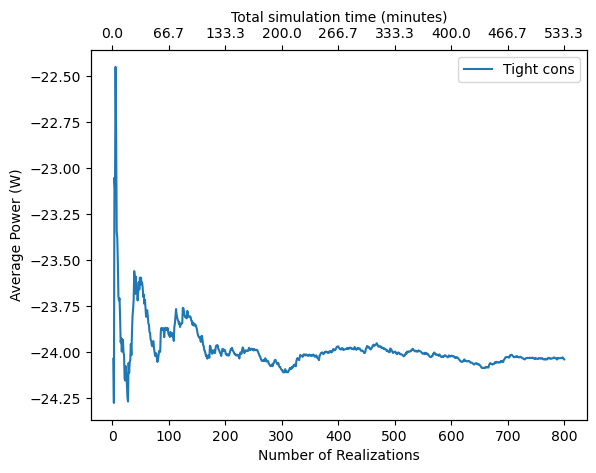

In [25]:
# load results
res_ds_50 = xr.load_dataset('wavebot_power_convergence_05.nc')
res_ds_25 = xr.load_dataset('wavebot_power_convergence.nc')
res_ds_tight_cons = xr.load_dataset('wavebot_power_convergence_50f_800r_tight_cons.nc')

#print(res_ds)

rolling_mean_50 = []
rolling_mean_25 = []
rolling_mean_tight_cons = []

for ind in range(len(res_ds_50['power'])):
    rolling_mean_50.append(np.mean(res_ds_50['power'][0:ind]))

for ind in range(len(res_ds_25['power'])):
    rolling_mean_25.append(np.mean(res_ds_25['power'][0:ind]))
    
for ind in range(len(res_ds_tight_cons['power'])):
    rolling_mean_tight_cons.append(np.mean(res_ds_tight_cons['power'][0:ind]))
    
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()
#ax1.plot(range(1,len(res_ds_50['power'])+1),rolling_mean_50,label='50 freqs')
#ax1.plot(range(1,len(res_ds_25['power'])+1),rolling_mean_25,label='25 freqs')
ax1.plot(range(1,len(res_ds_tight_cons['power'])+1),rolling_mean_tight_cons,label='Tight cons')
ax1.set_xlabel('Number of Realizations')
ax1.set_ylabel('Average Power (W)')
ax1.legend()
#ax1.xlim([200, 400])
#ax1.ylim([-39.3,-39.0])
    
# also plot total time
tperreal = 1/.025

def tick_function(X):
    V = tperreal*X/60
    return ["%.1f" % z for z in V]

ax2.set_xticks(ax1.get_xticks())
ax2.set_xbound(ax1.get_xbound())
ax2.set_xticklabels(tick_function(ax1.get_xticks()))
ax2.set_xlabel('Total simulation time (minutes)')

<Axes: xlabel='Theoretical quantiles', ylabel='Ordered quantiles'>

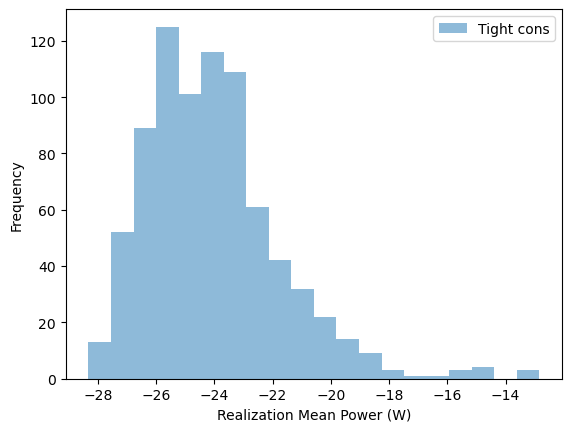

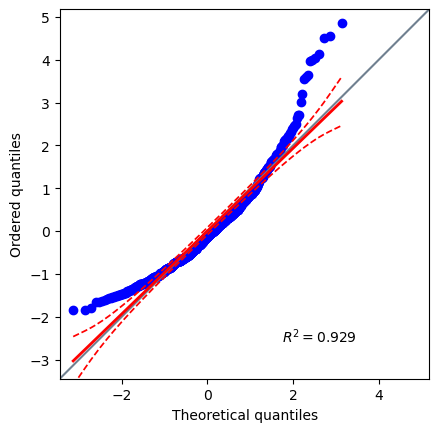

In [14]:
# analyze the statistical characteristics of each frequency number and realizations

plt.figure()
#plt.hist(res_ds_50['power'],bins=20,alpha=0.5,label='50 freqs')
#plt.hist(res_ds_25['power'],bins=20,alpha=0.5,label='25 freqs')
plt.hist(res_ds_tight_cons['power'],bins=20,alpha=0.5,label='Tight cons')
plt.legend()
plt.xlabel('Realization Mean Power (W)')
plt.ylabel('Frequency')

plt.figure()
pg.qqplot(res_ds_tight_cons['power'], dist='norm', confidence=.95)